# Analysis of Top 100 SaaS Companies - 2025

## Dataset Overview

This dataset includes details of 100 leading SaaS companies for the year 2025, capturing financial, operational, and performance-related information. It consists of the following columns:

- Company Name
- Founded Year
- HQ
- Industry
- Total Funding
- ARR (Annual Recurring Revenue)
- Valuation
- Employees
- Top Investors
- Product
- G2 Rating

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("top_100_saas_companies_2025.csv", encoding='ascii')

### Data Cleaning

Data formatting and conversion for monetary and numeric values.

In [93]:
def parse_currency(value):
    if pd.isnull(value):
        return np.nan
    value = value.replace('$', '').replace(',', '').strip()
    multipliers = {'K': 1e3, 'M': 1e6, 'B': 1e9, 'T': 1e12}
    if value[-1] in multipliers:
        return float(value[:-1]) * multipliers[value[-1]]
    try:
        return float(value)
    except:
        return np.nan

df['Total Funding'] = df['Total Funding'].apply(parse_currency)
df['ARR'] = df['ARR'].apply(parse_currency)
df['Valuation'] = df['Valuation'].apply(parse_currency)
df['Employees'] = df['Employees'].str.replace(',', '').astype(float)

This block parses currency fields and cleans the Employees column.

In [76]:
print('Data Shape:', df.shape)
print('Columns:', df.columns.tolist())
df.head()

Data Shape: (100, 11)
Columns: ['Company Name', 'Founded Year', 'HQ', 'Industry', 'Total Funding', 'ARR', 'Valuation', 'Employees', 'Top Investors', 'Product', 'G2 Rating']


,Company Name,Founded Year,HQ,Industry,Total Funding,ARR,Valuation,Employees,Top Investors,Product,G2 Rating
0,Microsoft,1975,"Redmond, WA, USA",Enterprise Software,1.000000e+09,2.700000e+11,3.000000e+12,221000.0,"Bill Gates, Paul Allen","Azure, Office 365, Teams",4.4
1,Salesforce,1999,"San Francisco, CA, USA",CRM,6.540000e+07,3.790000e+10,2.278000e+11,75000.0,"Halsey Minor, Larry Ellison","Sales Cloud, Service Cloud",4.3
2,Adobe,1982,"San Jose, CA, USA",Creative Software,2.500000e+06,1.940000e+10,2.400000e+11,29945.0,Hambrecht & Quist,"Creative Cloud, Document Cloud",4.5
3,Oracle,1977,"Austin, TX, USA",Database & Enterprise,2.000000e+03,5.290000e+10,3.500000e+11,143000.0,"Larry Ellison, Bob Miner","Oracle Cloud, NetSuite",4.0
4,SAP,1972,"Walldorf, Germany",Enterprise Software,NaN,3.250000e+10,2.150000e+11,107415.0,"Dietmar Hopp, Klaus Tschira","S/4HANA, SuccessFactors",4.1


Provides an overview of dataset dimensions and column names.

In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   100 non-null    object 
 1   Founded Year   100 non-null    int64  
 2   HQ             100 non-null    object 
 3   Industry       100 non-null    object 
 4   Total Funding  99 non-null     float64
 5   ARR            100 non-null    float64
 6   Valuation      88 non-null     float64
 7   Employees      100 non-null    float64
 8   Top Investors  100 non-null    object 
 9   Product        100 non-null    object 
 10  G2 Rating      100 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 8.7+ KB
None


Displays column data types and null values for a quick data health check.

### Exploratory Data Analysis (EDA)

In [78]:
sns.set(style="whitegrid")

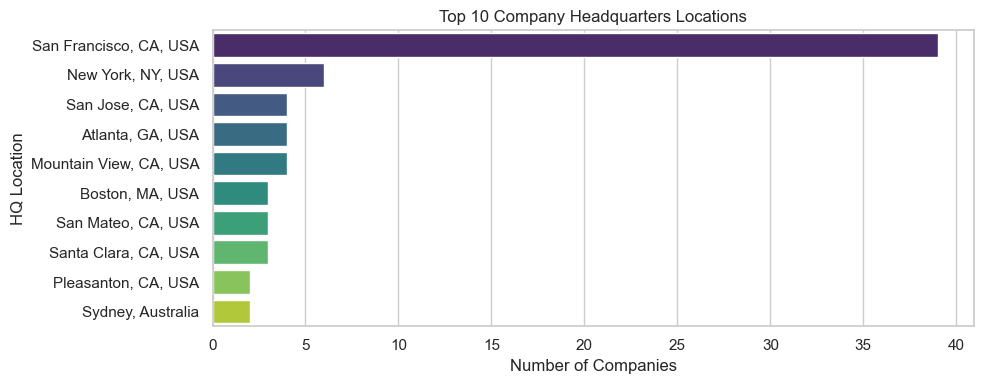

In [135]:
# Top 10 companies by HQ
plt.figure(figsize=(10, 4))
top_hq = df['HQ'].value_counts().nlargest(10)
sns.barplot(x=top_hq.values, y=top_hq.index, palette="viridis")
plt.title('Top 10 Company Headquarters Locations')
plt.xlabel('Number of Companies')
plt.ylabel('HQ Location')
plt.tight_layout()
plt.show()

Shows distribution of company headquarters.

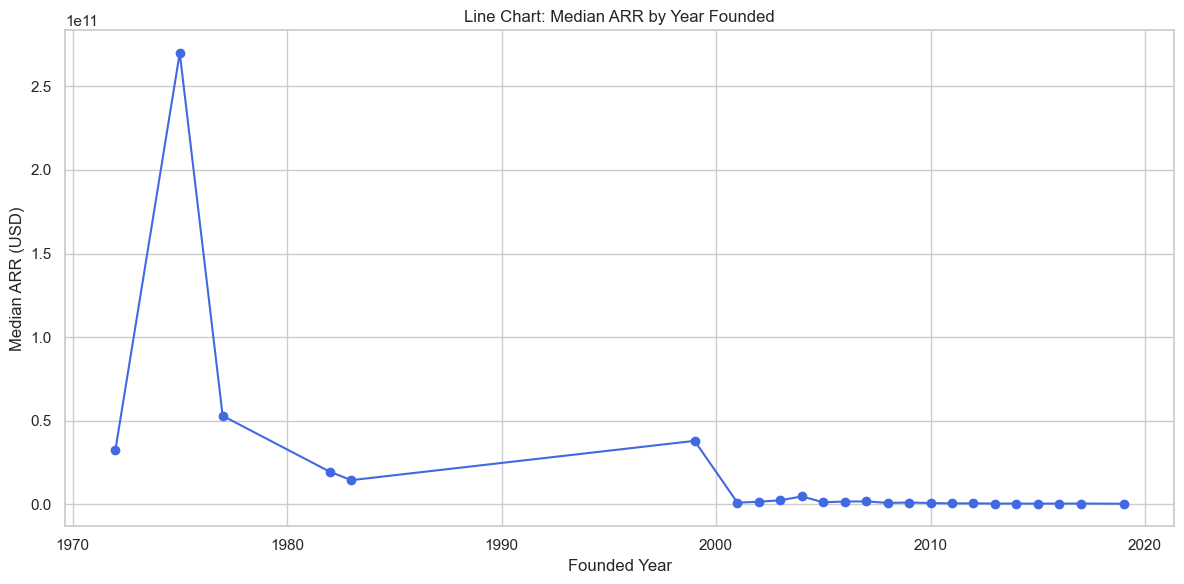

In [80]:
# Median ARR by Year Founded
median_by_year = df.groupby('Founded Year')['ARR'].median().dropna()
plt.figure(figsize=(12, 6))
plt.plot(median_by_year.index, median_by_year.values, marker='o', color='royalblue')
plt.title('Median ARR by Year Founded')
plt.xlabel('Founded Year')
plt.ylabel('Median ARR (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

Line graph showing how median ARR varies by founding year.

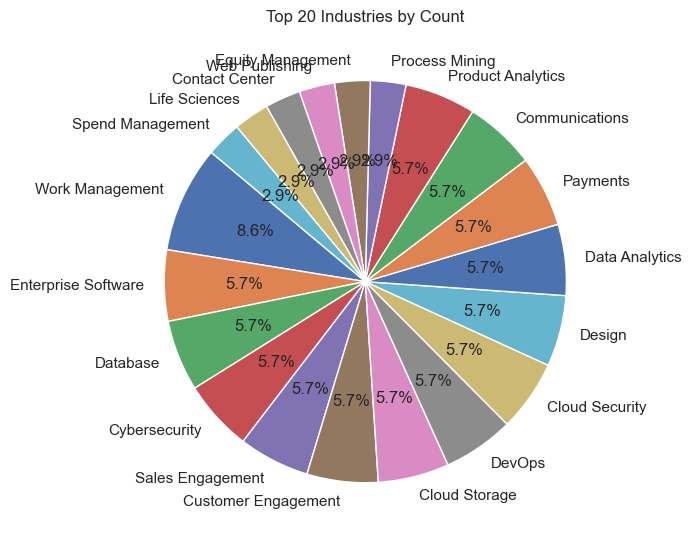

In [132]:
# Industry Proportion
industry_counts = df['Industry'].value_counts()
median_count = industry_counts.median()

top_20 = industry_counts.head(20)

plt.figure(figsize=(7, 7))
plt.pie(top_25, labels=top_25.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top 20 Industries by Count')
plt.tight_layout()
plt.show()

Pie chart representing proportion of companies per industry.

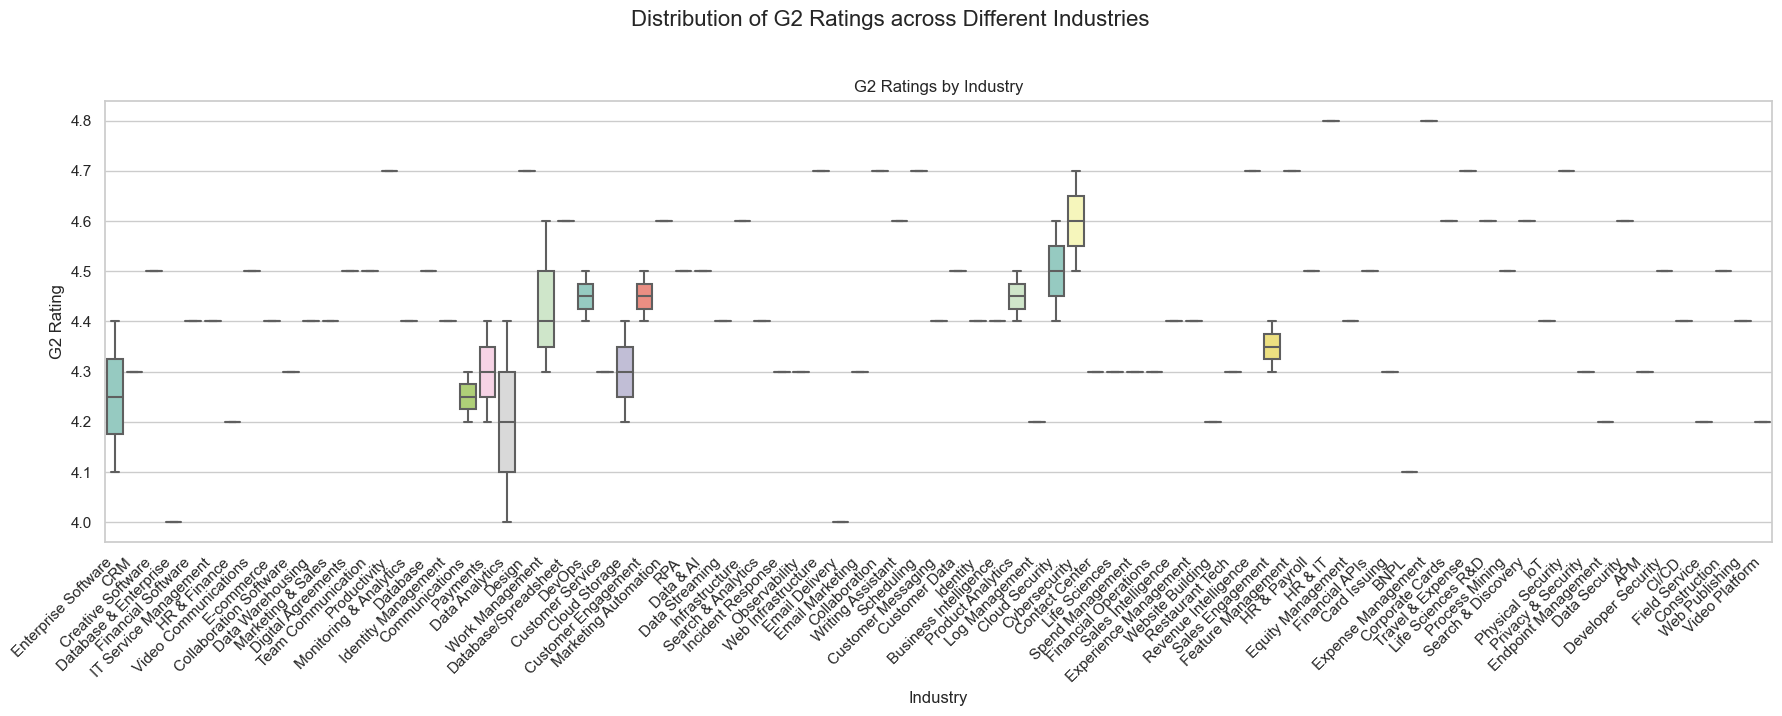

In [129]:
# G2 Rating by Industry
plt.figure(figsize=(18, 7))
sns.boxplot(data=df, x='Industry', y='G2 Rating', palette='Set3')
plt.title('G2 Ratings by Industry')
plt.suptitle('Distribution of G2 Ratings across Different Industries', fontsize=16, y=1.02)
plt.xlabel('Industry')
plt.ylabel('G2 Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Box and whiskers plot of G2 ratings across industries.

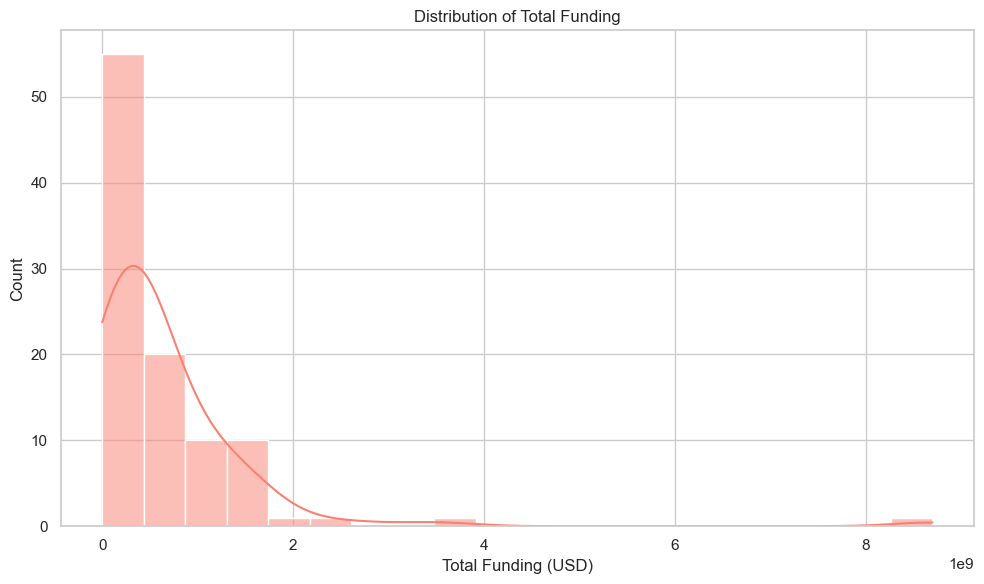

In [84]:
# Distribution of Total Funding
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Funding'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Distribution of Total Funding')
plt.xlabel('Total Funding (USD)')
plt.tight_layout()
plt.show()

Histogram to show distribution of funding amounts.

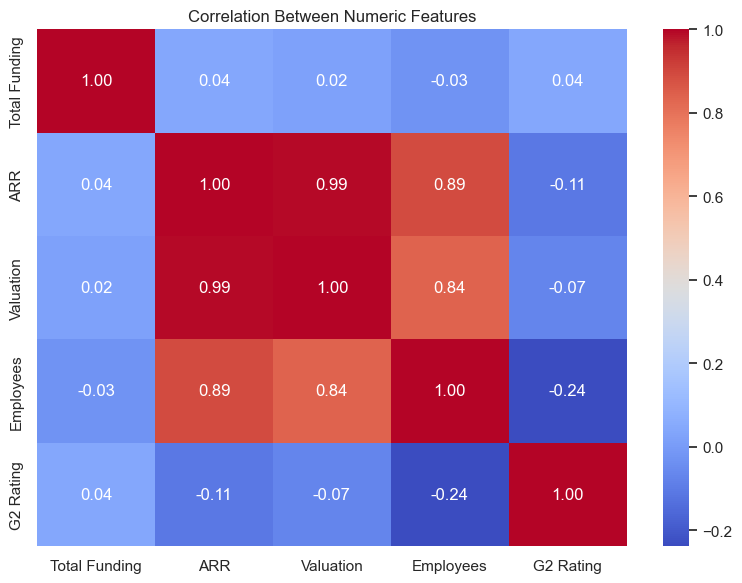

In [85]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df[['Total Funding', 'ARR', 'Valuation', 'Employees', 'G2 Rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Features')
plt.tight_layout()
plt.show()

Heatmap displaying correlation between numeric variables.

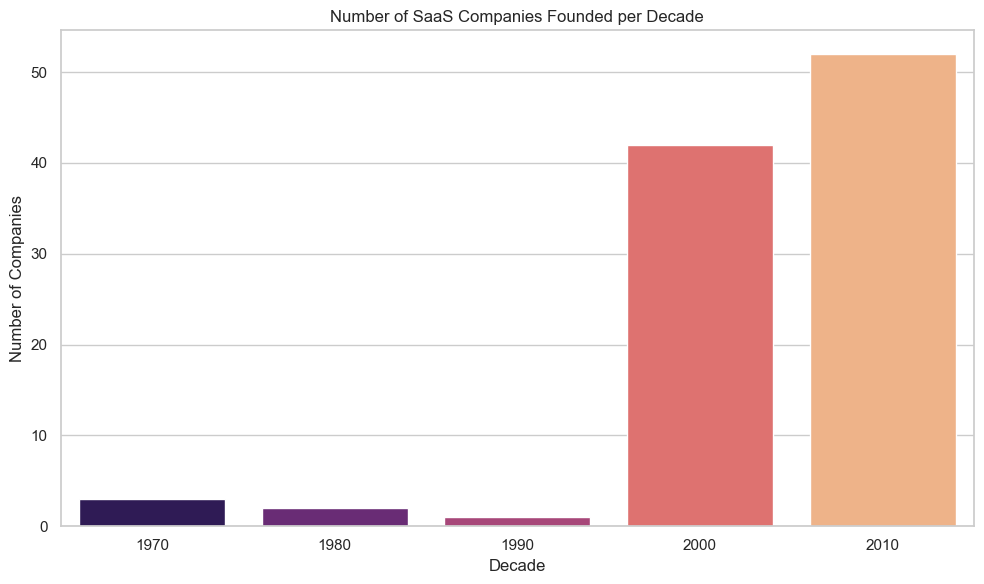

In [86]:
# Companies Founded Per Decade
df['Decade'] = (df['Founded Year'] // 10) * 10
decade_counts = df['Decade'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values, palette='magma')
plt.title('Number of SaaS Companies Founded per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()

Bar chart of company counts per founding decade.

### Hypothesis Testing

Hypothesis 1: ARR vs Valuation

/var/folders/s_/40xfjzhx4499g7w32zz0xnlw0000gn/T/ipykernel_11706/606251781.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


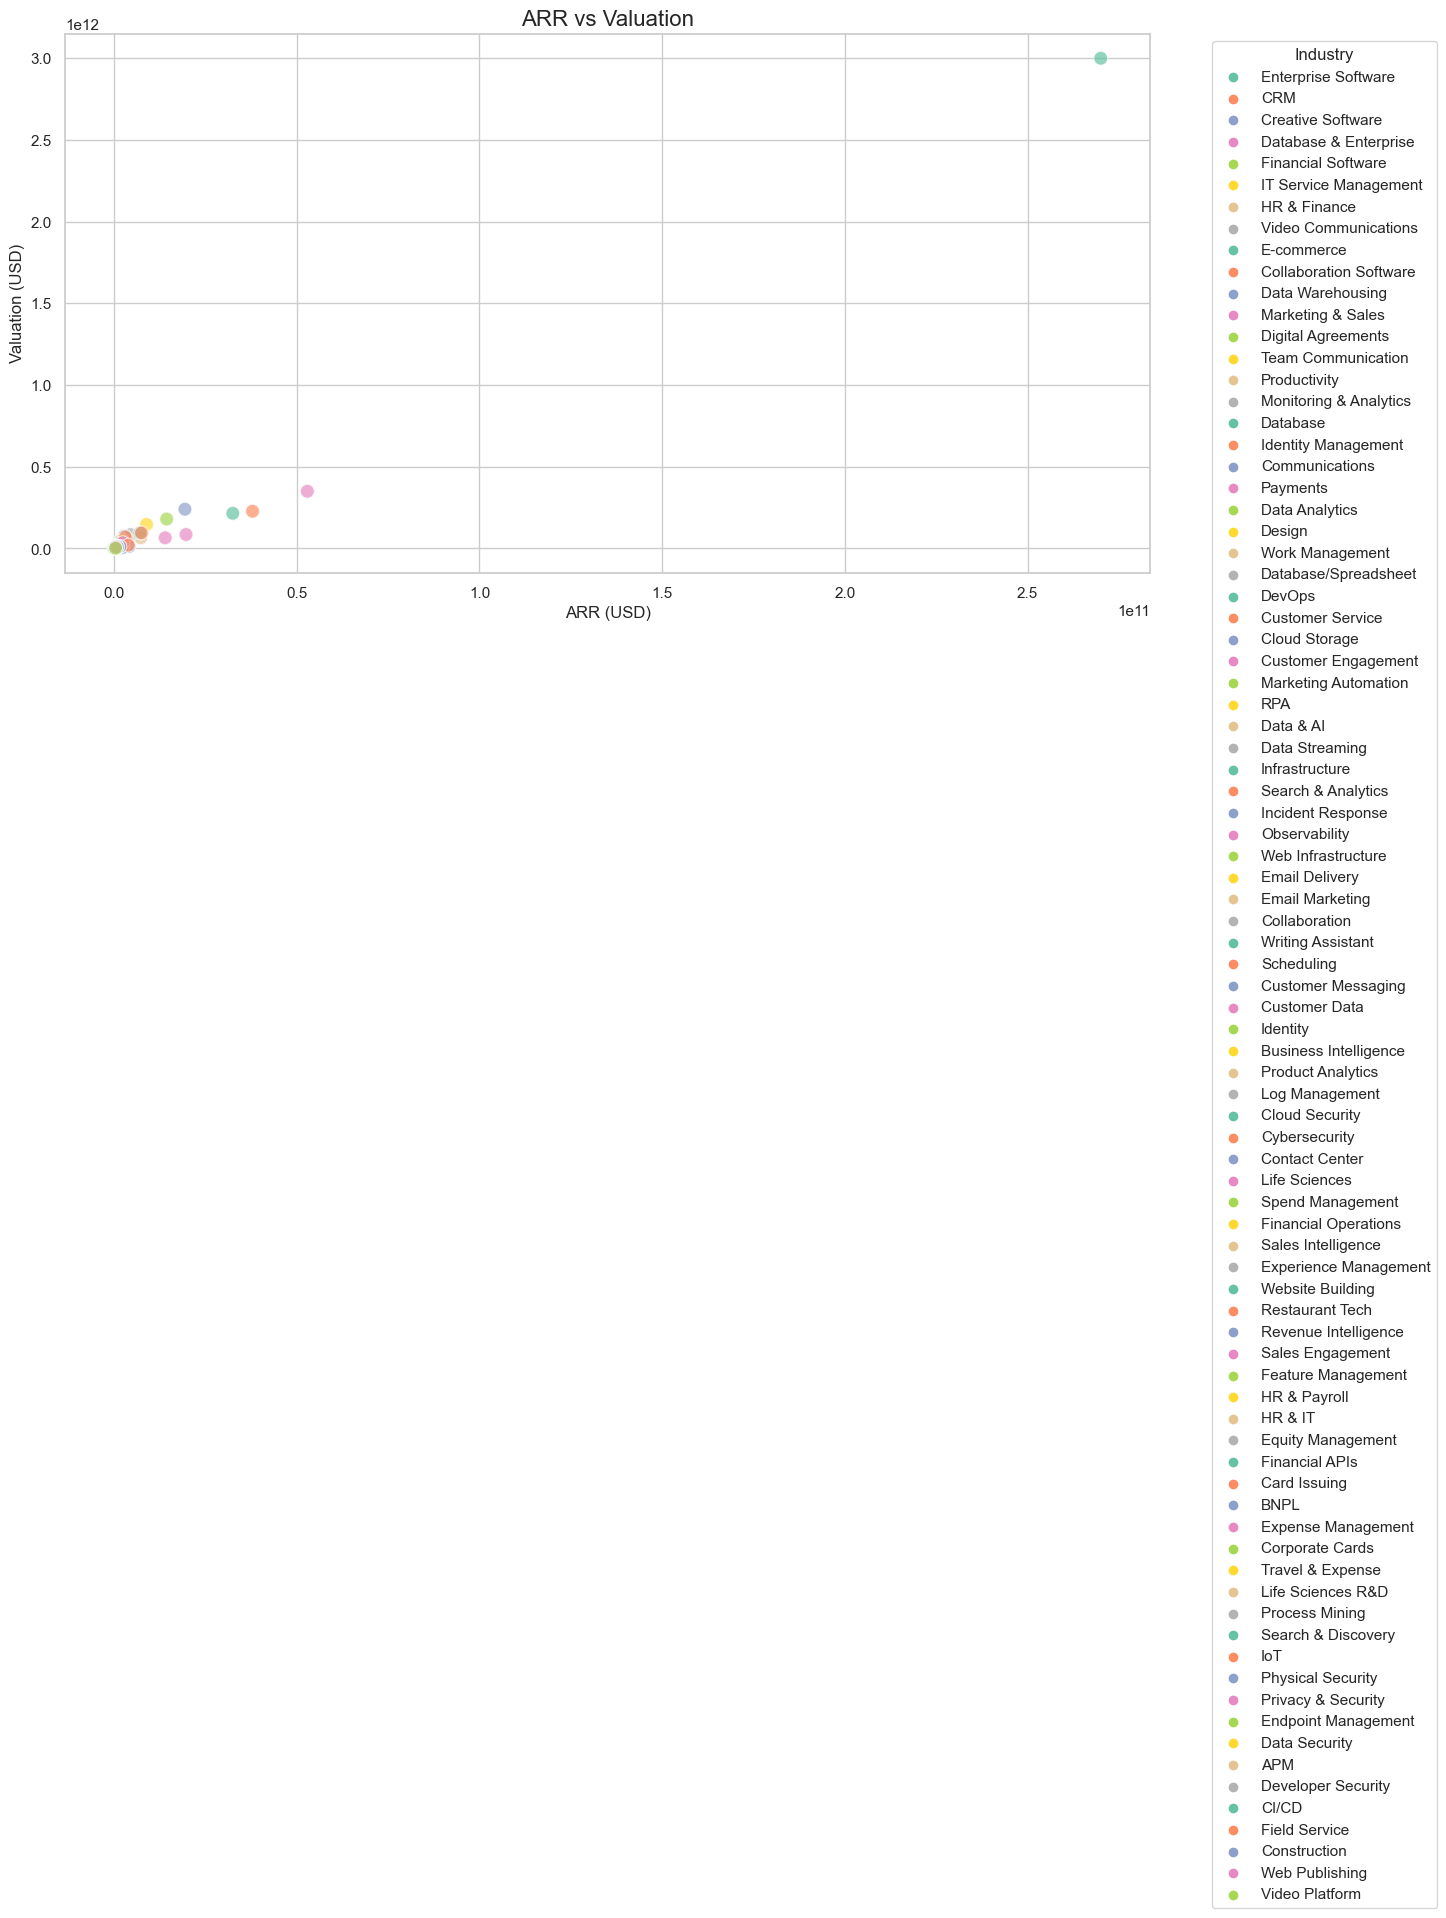

In [103]:
plt.figure(figsize=(14, 7))  # Increased width for better space
sns.scatterplot(data=df, x='ARR', y='Valuation', hue='Industry', s=100, alpha=0.7, palette='Set2')
plt.title('ARR vs Valuation', fontsize=16)
plt.xlabel('ARR (USD)', fontsize=12)
plt.ylabel('Valuation (USD)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Industry')
plt.tight_layout()
plt.show()

Examines correlation between ARR and company valuation.

Hypothesis 2: Median ARR by Industry

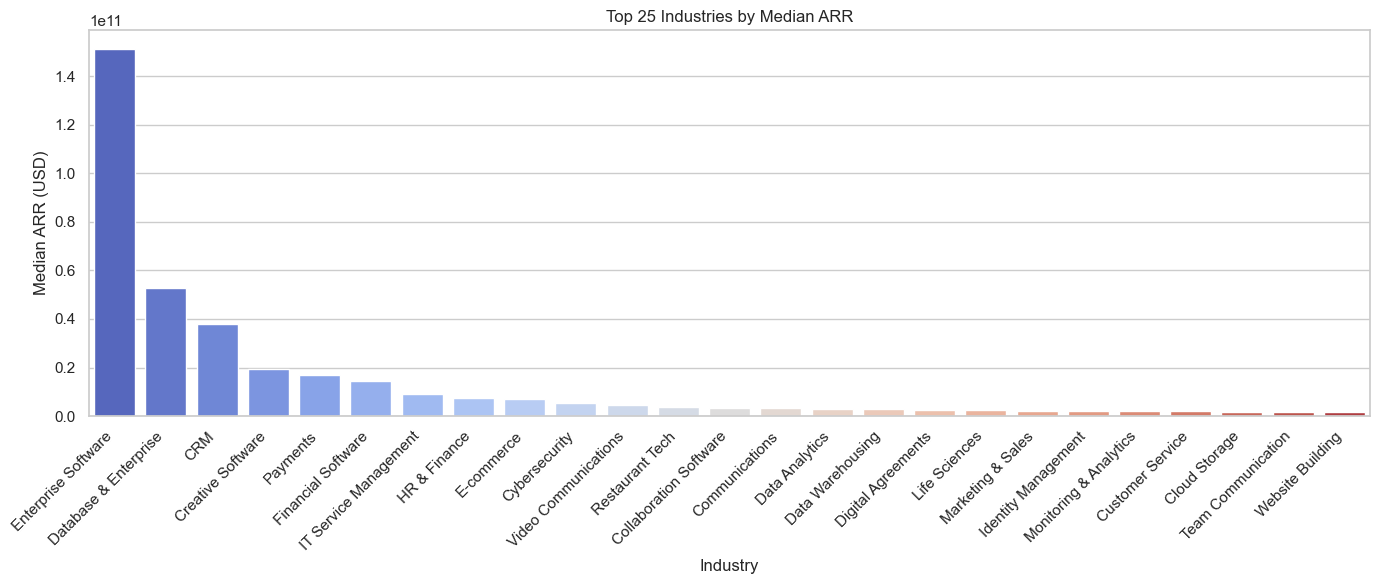

In [105]:
# Get median ARR per industry and take the top 25
arr_median = df.groupby('Industry')['ARR'].median().sort_values(ascending=False).head(25)

plt.figure(figsize=(14, 6))
sns.barplot(x=arr_median.index, y=arr_median.values, palette='coolwarm')
plt.title('Top 25 Industries by Median ARR')
plt.ylabel('Median ARR (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hypothesis 3: Top 20 Companies by G2 Rating

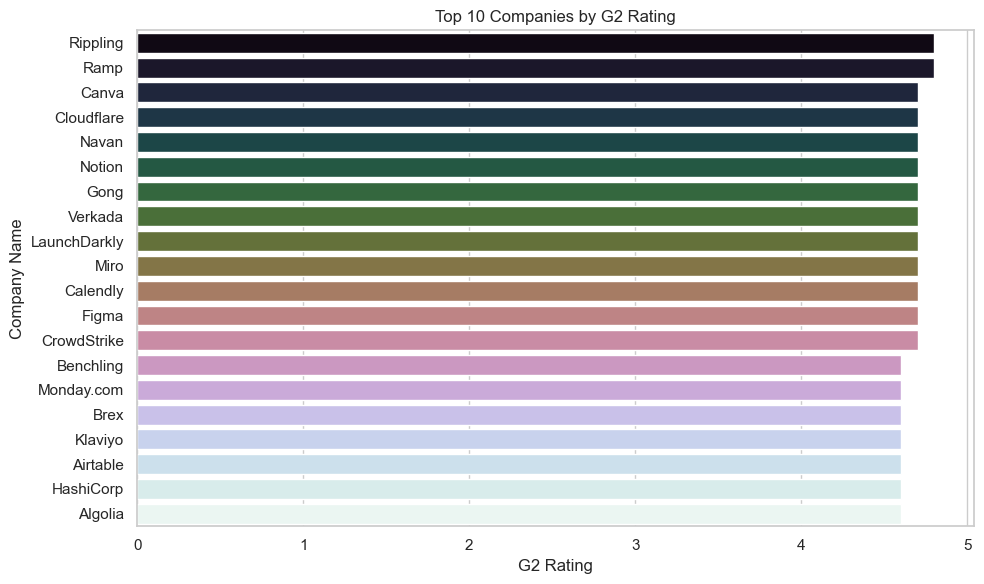

In [106]:
top_g2 = df.sort_values('G2 Rating', ascending=False).head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='G2 Rating', y='Company Name', data=top_g2, palette='cubehelix')
plt.title('Top 10 Companies by G2 Rating')
plt.tight_layout()
plt.show()

Displays companies with highest customer ratings.

Hypothesis 4: Funding vs G2 Rating

/var/folders/s_/40xfjzhx4499g7w32zz0xnlw0000gn/T/ipykernel_11706/643147204.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


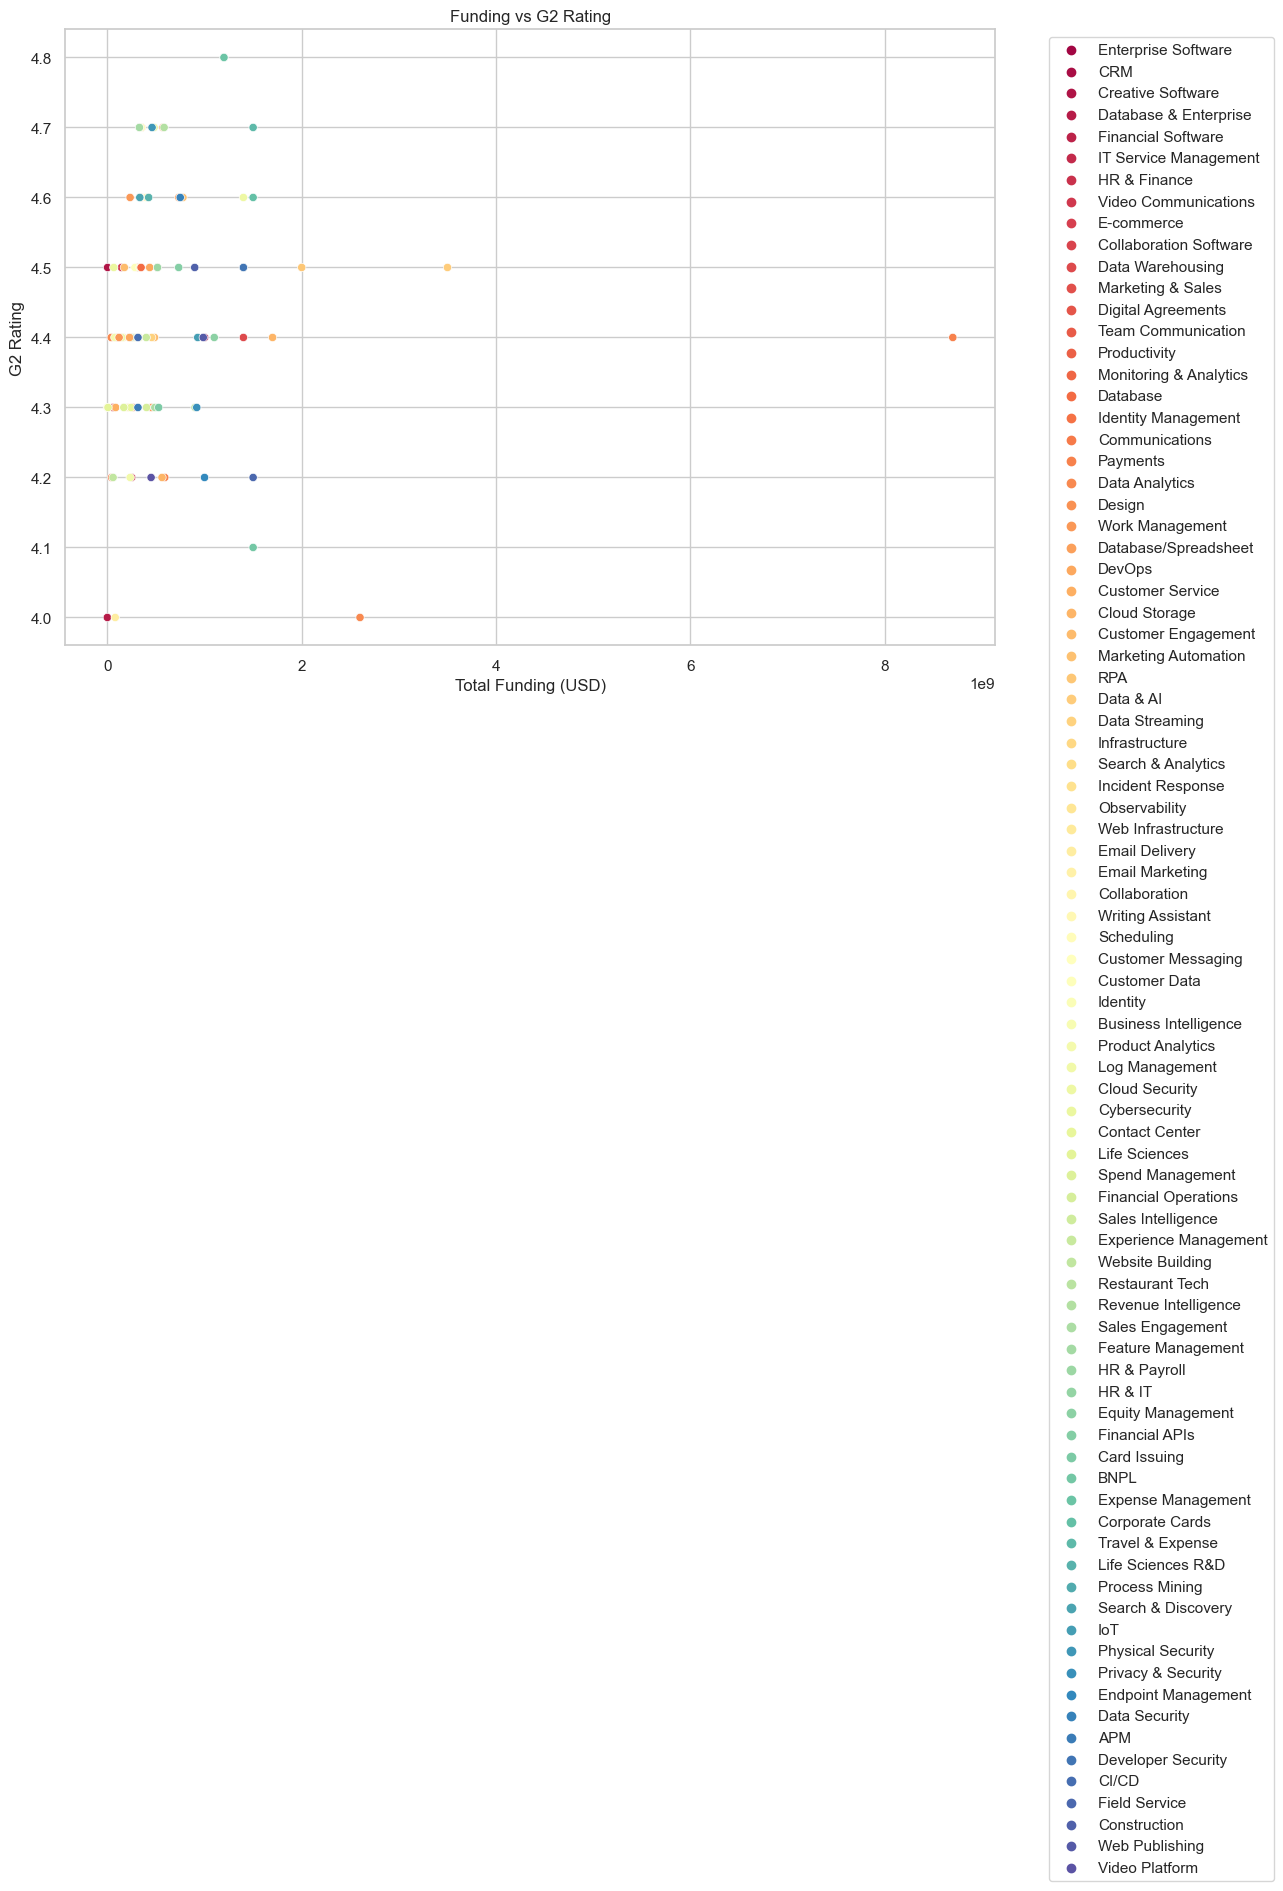

In [100]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Total Funding', y='G2 Rating', hue='Industry', palette='Spectral')
plt.title('Funding vs G2 Rating')
plt.xlabel('Total Funding (USD)')
plt.ylabel('G2 Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Explores if higher funding correlates with higher user satisfaction.

Hypothesis 5: Employees vs ARR

/var/folders/s_/40xfjzhx4499g7w32zz0xnlw0000gn/T/ipykernel_11706/3942083044.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


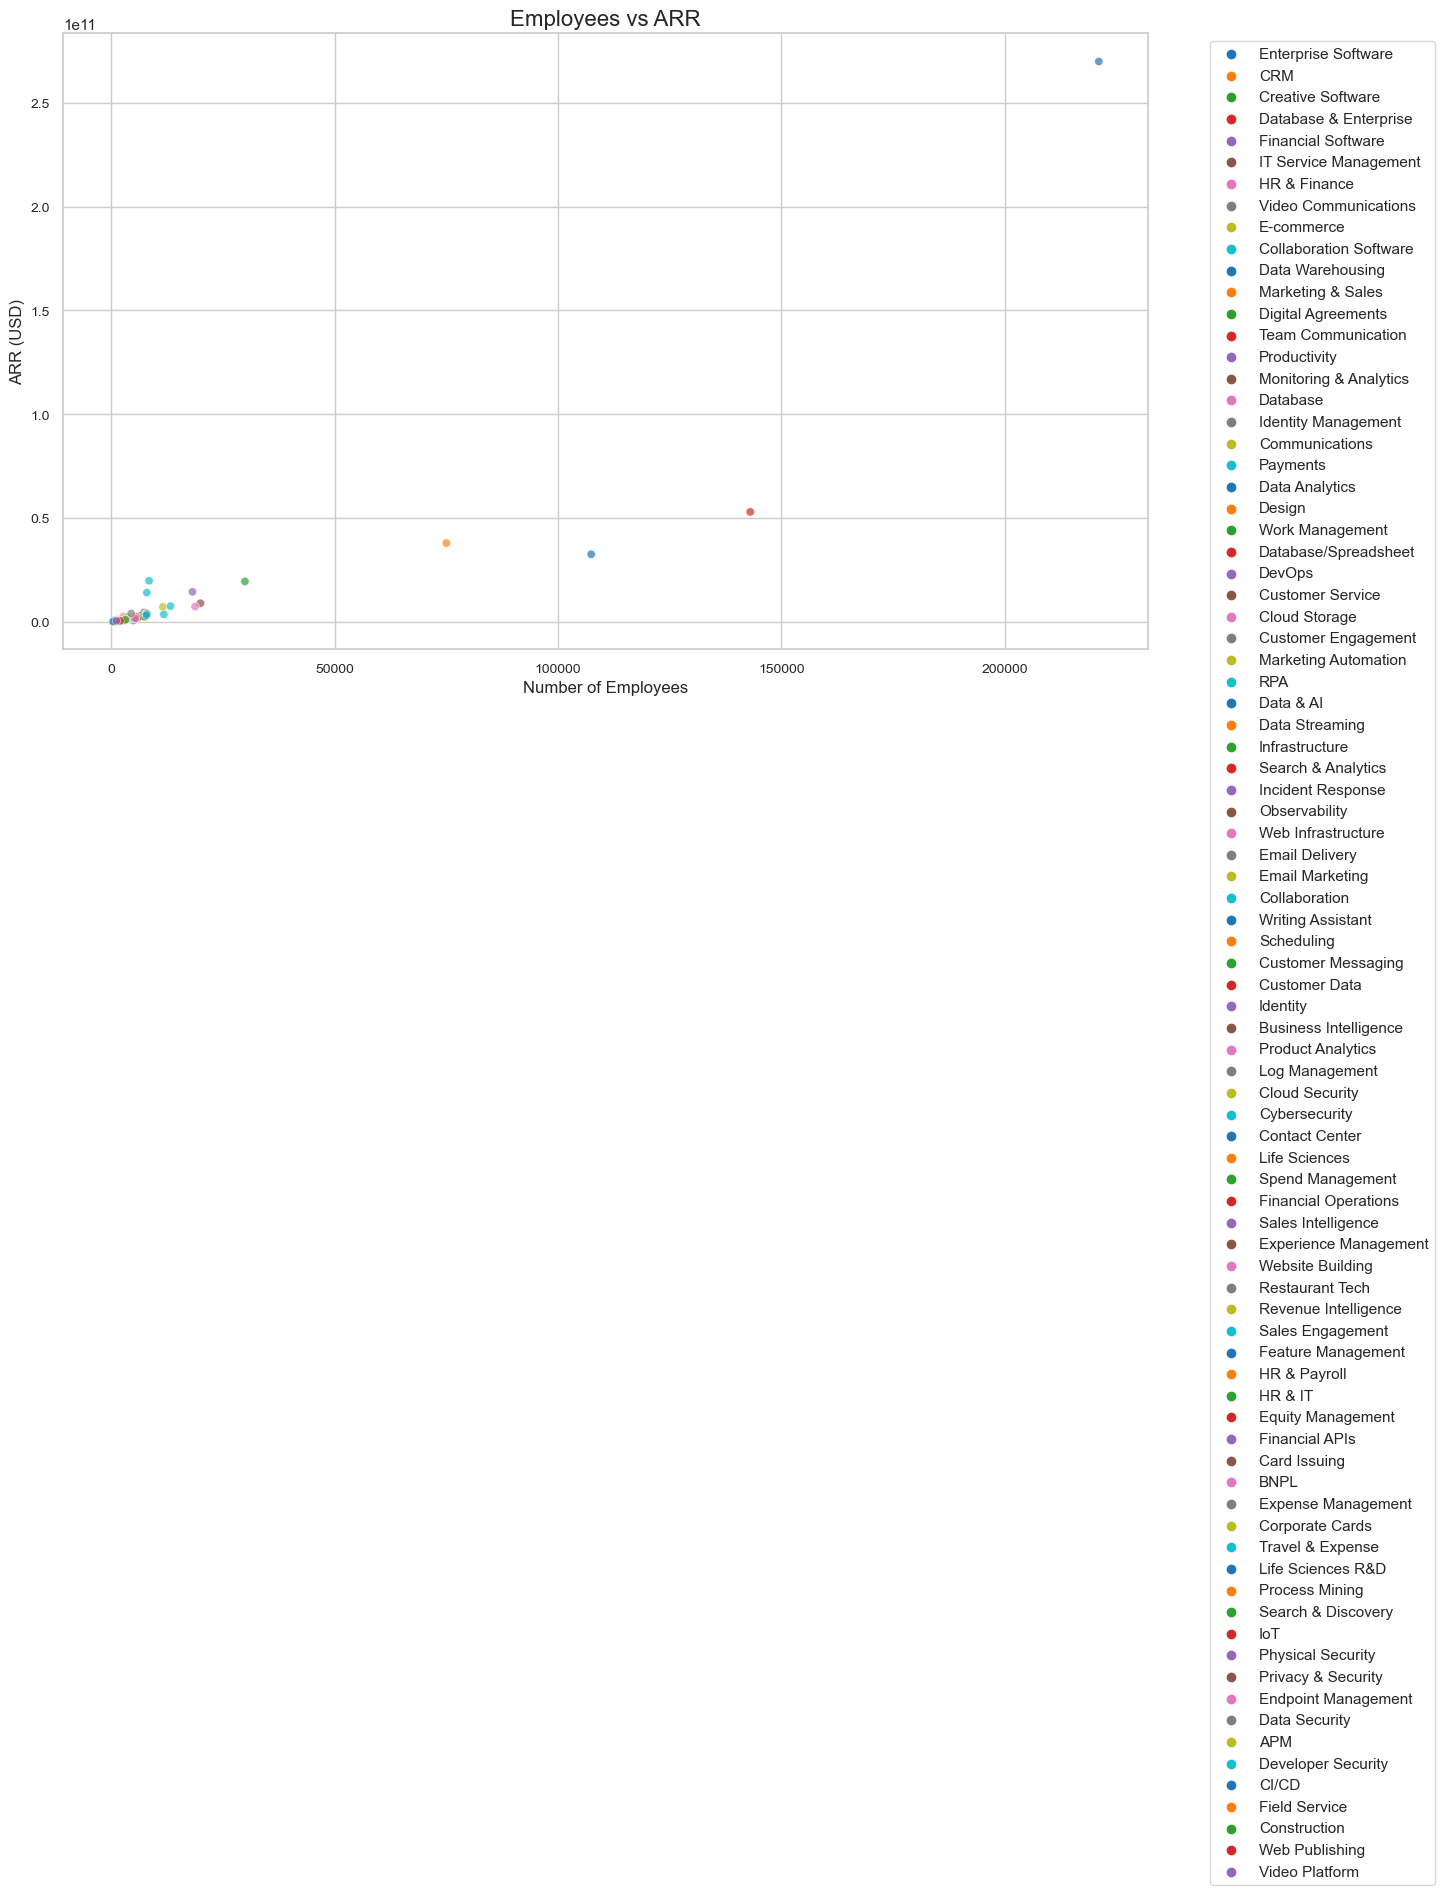

In [99]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Employees', y='ARR', hue='Industry', alpha=0.7, palette='tab10')
plt.title('Employees vs ARR', fontsize=16)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('ARR (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Visualizes the relation between workforce size and revenue.

This analysis provides a comprehensive visual and statistical look into the SaaS industry's leading companies for 2025 using various plot types and insights.